## Statistical data analysis project
I work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate.
### Purpose 
The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. 

let's jump right into it.
importing libraries:

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st

saving the CSVs:

In [9]:
try:
    df_calls = pd.read_csv('C:\\Users\\aviv\\Downloads\\practicum100\\megaline_calls.csv')
    df_internet = pd.read_csv('C:\\Users\\aviv\\Downloads\\practicum100\\megaline_internet.csv')
    df_messages = pd.read_csv('C:\\Users\\aviv\Downloads\\practicum100\\megaline_messages.csv')
    df_plans = pd.read_csv('C:\\Users\\aviv\\Downloads\\practicum100\\megaline_plans.csv')
    df_users = pd.read_csv('C:\\Users\\aviv\\Downloads\\practicum100\\megaline_users.csv')
    
except:
    df_calls = pd.read_csv('/datasets/megaline_calls.csv')
    df_internet = pd.read_csv('/datasets/megaline_internet.csv')
    df_messages = pd.read_csv('/datasets/megaline_messages.csv')
    df_plans = pd.read_csv('/datasets/megaline_plans.csv')
    df_users = pd.read_csv('/datasets/megaline_users.csv')

    



# Preprocessing stage
studying the dataframes for any errors:

In [10]:
print(df_calls.describe(),
      df_calls.info())
print(    df_calls.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000 None
             id   call_date
count    137735      137735
unique   137735         351
top     1000_93  2018-12-27
freq          1        1091


i see the dates are object-types here, will convert to datetime format.

In [11]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


adding month column:

In [12]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
#df_calls['month2'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls['year'] = pd.DatetimeIndex(df_calls['call_date']).year
df_calls['year'].value_counts()

2018    137735
Name: year, dtype: int64

rounding up call duration

In [13]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

In [14]:
df_calls['duration'].head()

0     9.0
1    14.0
2    15.0
3     6.0
4     5.0
Name: duration, dtype: float64

In [15]:
print(df_internet.describe(),
      df_internet.info())
print(df_internet.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000 None
             id session_date
count    104825       104825
unique   104825          351
top     1000_13   2018-12-24
freq          1          851


In [16]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [17]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
#df_internet['month2'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet['year'] = pd.DatetimeIndex(df_internet['session_date']).year
df_internet['year'].value_counts()

2018    104825
Name: year, dtype: int64

In [18]:
print(df_messages.describe(), 
df_messages.info())
print(df_messages.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000 None
              id message_date
count      76051        76051
unique     76051          351
top     1000_125   2018-12-28
freq           1          702


In [19]:
df_messages['message_date']=pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [20]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
#df_messages['month2'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages['year'] = pd.DatetimeIndex(df_messages['message_date']).year
df_messages['year'].value_counts()

2018    76051
Name: year, dtype: int64

In [21]:
print(df_plans.describe(),
      df_plans.info())
print(df_plans.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15

In [22]:
print(df_users.describe(),
      df_users.info())
print(df_users.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000 None
       first_name last_name                                       city  \
count         500       500                                        500   
unique       

In [23]:
for column in ['reg_date','churn_date']:
    df_users[column] = pd.to_datetime(df_users[column], format='%Y-%m-%d')
    
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [24]:
calls_grouped = df_calls.groupby(['user_id','month'])['duration'].sum()
#calls_grouped = df_calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()
#calls_grouped = df_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()


messages_grouped = df_messages.groupby(['user_id','month'])['message_date'].count()
#messages_grouped = df_messages.groupby(['user_id','month']).agg({'message_date' : ('count')}).reset_index()
#messages_grouped = df_messages.pivot_table(index = ('user_id','month'), values = 'message_date', aggfunc = ('count')).reset_index()


internet_grouped = df_internet.groupby(['user_id','month'])['mb_used'].sum()
#internet_grouped = df_internet.groupby(['user_id','month']).agg({'mb_used' : ('sum')}).reset_index()
#internet_grouped = df_internet.pivot_table(index = ('user_id','month'), values = 'mb_used', aggfunc = ('sum')).reset_index()

calls_grouped.head()
#messages_grouped
#internet_grouped

user_id  month
1000     12       124.0
1001     8        182.0
         9        315.0
         10       393.0
         11       426.0
Name: duration, dtype: float64

there are zeroes in the calls duration, will view them as missed calls and therefore not count them in the analysis.
otherwise, can round call summed values up one minute, and data summed values usage up one Gigabyte.

In [25]:




internet_grouped = internet_grouped.apply(lambda x: np.ceil(x / 1024)) #converting to Gb and rounding up

#calls_grouped


In [26]:
internet_grouped.head()

user_id  month
1000     12        2.0
1001     8         7.0
         9        14.0
         10       22.0
         11       19.0
Name: mb_used, dtype: float64

merging the dataframes to calculate revenue per plan per month

In [27]:
total1= pd.merge(left = internet_grouped , right = calls_grouped, how='outer',on=['user_id', 'month']).fillna(0)
total2=pd.merge(left = total1 , right = messages_grouped, how='outer',on=['user_id', 'month']).fillna(0)
total2.reset_index( inplace=True)
total2.head()
total3=pd.merge(left = total2 , right = df_users, how = 'outer', on=['user_id']).fillna(0)
total3.columns=['user_id','month','gb_used','duration','message_count','first_name','last_name','age','city','reg_date','plan','churn_date']
total3.head(10)

,user_id,month,gb_used,duration,message_count,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,2.0,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,8.0,7.0,182.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1001,9.0,14.0,315.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
3,1001,10.0,22.0,393.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
4,1001,11.0,19.0,426.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
5,1001,12.0,19.0,412.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
6,1002,10.0,7.0,59.0,15.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0
7,1002,11.0,19.0,386.0,32.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0
8,1002,12.0,15.0,384.0,41.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0
9,1003,12.0,27.0,1104.0,50.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0


defining a function that'll compute the revenue per user per month

In [28]:
def cost(row):
    cost=0
    gb_used=row['gb_used']
    duration=row['duration']
    message_count=row['message_count']
    plan=row['plan']
    if plan=='surf':
        if message_count>50:
            cost+=(message_count-50)*0.03
        if duration>500:
            cost+=(duration-500)*0.03
        if gb_used>15:
            cost+=(gb_used-15)*10
        return cost+20
    if plan=='ultimate':
        if message_count>1000:
            cost+=(message_count-1000)*0.01
        if duration>3000:
            cost+=(duration-3000)*0.01
        if gb_used>30:
            cost+=(gb_used-30)*7
        return cost+70
    
    

applying the cost function row-wise

In [29]:
total3['total_cost']=total3.apply(cost,axis=1)



In [30]:
total3.head()

,user_id,month,gb_used,duration,message_count,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
0,1000,12.0,2.0,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,70.00
1,1001,8.0,7.0,182.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
2,1001,9.0,14.0,315.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
3,1001,10.0,22.0,393.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,90.09
4,1001,11.0,19.0,426.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00


yes! we got all we need

## Analysis

subsetting the data by plans:

In [31]:
surf=total3.query("plan == 'surf'")

ultimate = total3.query("plan == 'ultimate'")

plotting minutes, texts, volume of data:

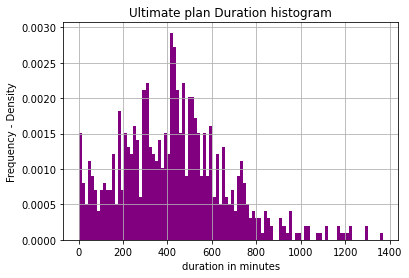

ultimate minutes mean: 428.0718232044199 ultimate minutes variance: 58463.016940874775
ultimate minutes standard deviation: 241.79126729655638
most of the data can be found in this range: (-297.30197868524925, 1153.445625094089)


In [32]:
ultimate_minutes_mean = ultimate['duration'].mean()
ultimate_minutes_variance = np.var(ultimate['duration'])
ultimate_minutes_std = np.sqrt(ultimate_minutes_variance)
fig = ultimate.hist('duration', density=True, bins = 100, color='purple')
plt.xlabel('duration in minutes')
plt.ylabel('Frequency - Density')
plt.title('Ultimate plan Duration histogram')
plt.show()
print("ultimate minutes mean:", ultimate_minutes_mean, "ultimate minutes variance:", ultimate_minutes_variance)
print("ultimate minutes standard deviation:", ultimate_minutes_std)
print("most of the data can be found in this range:", (ultimate_minutes_mean - 3*ultimate_minutes_std, ultimate_minutes_mean + 3*ultimate_minutes_std))

the duration histogram looks like a normal bell curve skewed to the right. there's a spike close to zero probably because many people don't call anymore (personally i've grown to hate calls since messaging became so easy)
the values are concentrated around 428 minutes.

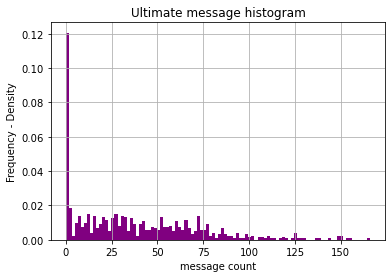

ultimate message mean: 37.3439226519337 ultimate text variance: 1208.156579087935
ultimate texts standard deviation: 34.758546849486315
most of the data can be found in this range: (0, 141.61956320039263)


In [33]:
ultimate_texts_mean = ultimate['message_count'].mean()
ultimate_texts_variance = np.var(ultimate['message_count'])
ultimate_texts_std = np.sqrt(ultimate_texts_variance)
fig = ultimate.hist('message_count', density=True, bins=100, color='purple')
plt.xlabel('message count')
plt.ylabel('Frequency - Density')
plt.title('Ultimate message histogram')
plt.show()
print("ultimate message mean:", ultimate_texts_mean, "ultimate text variance:", ultimate_texts_variance)
print("ultimate texts standard deviation:", ultimate_texts_std)
print("most of the data can be found in this range:", (0, ultimate_texts_mean + 3*ultimate_texts_std))

looks like the message histogram is uniformly distributed more or less. spike at zero can be explained by increase in messaging apps like whatsapp, telegram instead of old Short Messaging Service (SMS)

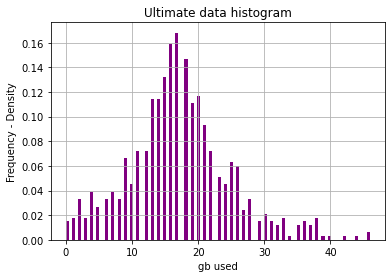

ultimate data mean: 17.21132596685083 ultimate data variance: 60.06998221971226
ultimate data standard deviation: 7.750482708819642
most of the data can be found in this range: (0, 40.462774093309754)


In [34]:
ultimate_data_mean = ultimate['gb_used'].mean()
ultimate_data_variance = np.var(ultimate['gb_used'])
ultimate_data_std = np.sqrt(ultimate_data_variance)
fig = ultimate.hist('gb_used', density=True, bins =100, color='purple')
plt.xlabel('gb used')
plt.ylabel('Frequency - Density')
plt.title('Ultimate data histogram')
plt.show()
print("ultimate data mean:", ultimate_data_mean, "ultimate data variance:", ultimate_data_variance)
print("ultimate data standard deviation:", ultimate_data_std)
print("most of the data can be found in this range:", (0, ultimate_data_mean + 3*ultimate_data_std))

in the data histogram we got a beautiful bell curve. in contrast to calls and texts, we see a much more regular distribution around the mean of 17 Gb, everyone uses data to some degree!

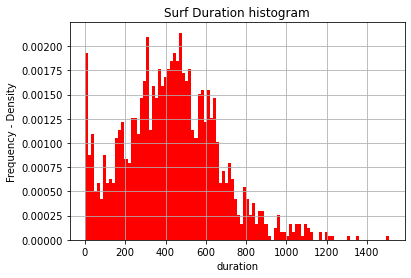

surf minutes mean: 427.12032932235593 surf minutes variance: 55420.456705148026
surf minutes standard deviation: 235.41549801393285
most of the data can be found in this range: (0, 1133.3668233641545)


In [35]:
surf_minutes_mean = surf['duration'].mean()
surf_minutes_variance = np.var(surf['duration'])
surf_minutes_std = np.sqrt(surf_minutes_variance)
fig = surf.hist('duration', density=True, bins=100, color='red')
plt.xlabel('duration')
plt.ylabel('Frequency - Density')
plt.title('Surf Duration histogram')
plt.show()
print("surf minutes mean:", surf_minutes_mean, "surf minutes variance:", surf_minutes_variance)
print("surf minutes standard deviation:", surf_minutes_std)
print("most of the data can be found in this range:", (0, surf_minutes_mean + 3*surf_minutes_std))

mean is practically the same as Ultimate plan, though we got a LOT more data here. the plan is cheaper, so obviously more people choose it
also looks like a normal distribution skewed to the right

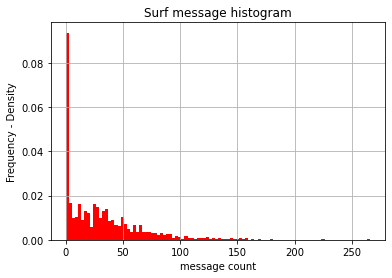

surf texts mean: 31.041165294490185 surf text variance: 1125.4048918656445
surf texts standard deviation: 33.5470548910876
most of the data can be found in this range: (0, 131.682329967753)


In [36]:
surf_texts_mean = surf['message_count'].mean()
surf_texts_variance = np.var(surf['message_count'])
surf_texts_std = np.sqrt(surf_texts_variance)
fig = surf.hist('message_count', density=True, bins=100, color='red')
plt.xlabel('message count')
plt.ylabel('Frequency - Density')
plt.title('Surf message histogram')
plt.show()
print("surf texts mean:", surf_texts_mean, "surf text variance:", surf_texts_variance)
print("surf texts standard deviation:", surf_texts_std)
print("most of the data can be found in this range:", (0, surf_texts_mean + 3*surf_texts_std))

as there are more data points, we get a more normal (though skewed to the right) distribution. still huge spike at zero

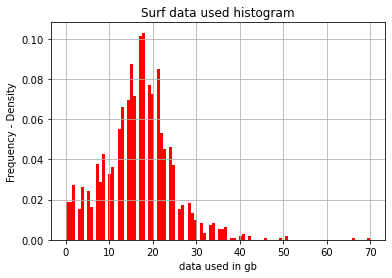

surf data mean: 16.60734642178594 surf data variance: 62.36260594142332
surf data standard deviation: 7.896999806345655
most of the data can be found in this range: (0, 40.298345840822904)


In [37]:
surf_data_mean = surf['gb_used'].mean()
surf_data_variance = np.var(surf['gb_used'])
surf_data_std = np.sqrt(surf_data_variance)
fig = surf.hist('gb_used', density=True,bins= 100, color='red')
plt.xlabel('data used in gb')
plt.ylabel('Frequency - Density')
plt.title('Surf data used histogram')
plt.show()
print("surf data mean:", surf_data_mean, "surf data variance:", surf_data_variance)
print("surf data standard deviation:", surf_data_std)
print("most of the data can be found in this range:", (0, surf_data_mean + 3*surf_data_std))

as with the ultimate data histogram, we get a neat little bell curve.

## Testing hypotheses

hypothesis 1 - the average revenue from users of Ultimate and Surf calling plans differs.
in that case, the null hypothesis is that the average revenue is the same because we want the equals sign in the null hypothesis.

hypothesis 2 - the average revenue from users in NY-NJ area is different from that of the users from other regions.
for the same reason as hypothesis 1, the null hypothesis will be that the average revenue from the 2 areas is the same.

we'll use a standard alpha value of 5%. 

In [38]:


print("variance for ultimate user revenue:", np.var(ultimate['total_cost']))
print("variance for surf user revenue:", np.var(surf['total_cost']))
print("the variance is not in the same ballpark so we'll set equal_var=False while testing")

st.levene(surf['total_cost'], ultimate['total_cost'], center='mean')

variance for ultimate user revenue: 128.98115900002801
variance for surf user revenue: 3060.5073785813947
the variance is not in the same ballpark so we'll set equal_var=False while testing


LeveneResult(statistic=598.0794664776835, pvalue=1.3114884106245685e-117)

we can reject the null hypothesis that the variances are equal

In [39]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

result1 = st.ttest_ind(
    surf['total_cost'], ultimate['total_cost'], equal_var=False)
print('p-value: ', result1.pvalue)
if result1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
print("surf mean:", surf['total_cost'].mean())
print("ultimate mean:", ultimate['total_cost'].mean())

p-value:  1.2184115852123163e-15
We reject the null hypothesis
surf mean: 60.5517289423685
ultimate mean: 72.3011049723757


we see the ultimate plan brings in more revenue on average, and the t-test confirms it, the p-value is much smaller than our chosen alpha.

In [40]:
NY_NJ=total3[total3['city'].str.contains("NY-NJ")]

other_areas=total3[~total3['city'].str.contains("NY-NJ")]


In [41]:
print("NY-NJ variance is ",np.var(NY_NJ['total_cost']))
print("other areas variance is ", np.var(other_areas['total_cost']))

NY-NJ variance is  1885.7843645817604
other areas variance is  2219.881380131204


the variances are close, let's test them

In [42]:
st.levene(NY_NJ['total_cost'], other_areas['total_cost'], center='mean')

LeveneResult(statistic=1.7386932171327423, pvalue=0.18743571504599707)

we can't reject the null hypothesis that the variances are equal, therefore we'll set equal_var=True.
now we'll test for the null hypothesis that the average revenue for users in the NY-NJ area is the same as users in other areas.

In [43]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

result2 = st.ttest_ind(
    NY_NJ['total_cost'], other_areas['total_cost'], equal_var=True)
print('p-value: ', result2.pvalue)
if result2.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
print("NY-NJ mean:", surf['total_cost'].mean())
print("other areas mean:", ultimate['total_cost'].mean())

p-value:  0.049745282774076104
We reject the null hypothesis
NY-NJ mean: 60.5517289423685
other areas mean: 72.3011049723757


based on the statistical test, we can reject the null hypothesis. although the p-value is really close to our alpha, it's like a borderline case. in practice we see the means are different.

# General Conclusion

### Preprocessing
we've changed the date column types from object to datetime so we can access the month number to add month column in order to group by user monthly for calculation of monthly average per user. if this kind of analysis is needed on a regular basis, i'd ask the data engineers to gather the date information in date-time format so it would be easier for everyone who works on the data to access needed parts (months, years)
we also rounded up minutes per call.

### Analysis
we saw that a lot of the customers don't use calls or texts. they either don't call or use internet based calling and messaging apps. the advertising should focus more on data and less on calls and texts as they are getting more outdated methods of communication

### Testing Hypotheses


we've analysed plan monthly revenue per user, and saw that the Ultimate plan brings in more money on average. a reasonable explanation would be that people who get the Ultimate plan know ahead of time that they're heavy phone users, so they also use up all of their allowances (data ,text , call limits) i'd advise the commercial department to divert the ad budget to advertising the ultimate plan. 

